## Análisis de datos obtenidos

In [1]:
import pandas as pd 
import glob 
import os

In [4]:
# ejecutamos tres datasets obtenidos por cada uno de compañeros
movies_all = pd.read_csv('movies__Anna.csv')
movies_all.drop('Unnamed: 0', axis=1, inplace=True)
movies_all

,titulo,link,descripcion
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,Un oficial del ejército estadounidense que sir...
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"En la época victoriana, dos niños naufragan en..."
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,La tripulación de una nave espacial comercial ...
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,Una familia se dirige a un hotel aislado para ...
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,Tras ser brutalmente dominados los rebeldes po...
...,...,...,...
149384,Afetname,https://www.imdb.com/title/tt19409208/?ref_=ad...,NaN
149385,Time provider,https://www.imdb.com/title/tt19409272/?ref_=ad...,This is adapted from a real story that happene...
149386,All Your Friends Are Dead,https://www.imdb.com/title/tt19409324/?ref_=ad...,NaN
149387,Primary Position,https://www.imdb.com/title/tt19409924/?ref_=ad...,NaN


In [5]:
%%time

# detectamos las decripciones en inglés

from langdetect import detect

lang = []    
    
for index, row in movies_all['descripcion'].iteritems():
    movies_all['descripcion'] = movies_all['descripcion'].apply(str)
    try:
        lang = detect(row) #detecting each row
    except:
        lang = "error"
    movies_all.loc[index, 'descripcion_idioma'] = lang

# guardamos el dataset con idiomas detectados
movies_all.to_csv('movies_detect_Anna.csv', encoding='utf-8-sig')
movies_all

Wall time: 1h 57min 42s


,titulo,link,descripcion,descripcion_idioma
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,Un oficial del ejército estadounidense que sir...,es
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"En la época victoriana, dos niños naufragan en...",es
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,La tripulación de una nave espacial comercial ...,es
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,Una familia se dirige a un hotel aislado para ...,es
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,Tras ser brutalmente dominados los rebeldes po...,es
...,...,...,...,...
149384,Afetname,https://www.imdb.com/title/tt19409208/?ref_=ad...,nan,tl
149385,Time provider,https://www.imdb.com/title/tt19409272/?ref_=ad...,This is adapted from a real story that happene...,en
149386,All Your Friends Are Dead,https://www.imdb.com/title/tt19409324/?ref_=ad...,nan,tl
149387,Primary Position,https://www.imdb.com/title/tt19409924/?ref_=ad...,nan,tl


### Juntamos todos los datasets extraídos

https://www.tutorialspoint.com/how-to-merge-all-csv-files-into-a-single-dataframe-python-pandas

In [6]:
# establecemos la ruta para unir varios archivos
files = os.path.join("movies_detect_*.csv")

In [7]:
# lista de archivos combinados
files = glob.glob(files)

In [8]:
# unimos archivos con concat y read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

# eliminamos columna Unnamed: 0 para que no aparezca la numeración individual de cada archivo
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# guardamos el archivo conjunto
df.to_csv('movies_detect_all.csv', encoding='utf-8-sig')

### Analizamos los datos

In [2]:
movies_detect = pd.read_csv('movies_detect_all.csv')
movies_detect.drop('Unnamed: 0', axis=1, inplace=True)
movies_detect

,titulo,link,descripcion,descripcion_idioma
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,Un oficial del ejército estadounidense que sir...,es
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"En la época victoriana, dos niños naufragan en...",es
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,La tripulación de una nave espacial comercial ...,es
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,Una familia se dirige a un hotel aislado para ...,es
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,Tras ser brutalmente dominados los rebeldes po...,es
...,...,...,...,...
404570,Kings of Boston,https://www.imdb.com/title/tt1640670/?ref_=adv...,Two wannabe gangsters happen upon a suitcase f...,en
404571,Bertrand beulrie Bert,https://www.imdb.com/title/tt6450002/?ref_=adv...,NaN,tl
404572,"The Berlin Wall, Trajectory of the Fall,",https://www.imdb.com/title/tt14318624/?ref_=ad...,NaN,tl
404573,Kokuhaku: Nurse no Zangyo,https://www.imdb.com/title/tt2298383/?ref_=adv...,Yukiko is a nurse working at a general hospita...,en


In [3]:
# renombramos tl a NaN para que sea más facil
movies_detect['descripcion_idioma'].replace({'tl':'NaN'}, inplace=True)
#movies_detect

In [72]:
# analizamos la columna descripcion_idioma
movies_detect_lang = movies_detect.groupby(['descripcion_idioma']).size().sort_values(ascending=False)
movies_detect_lang

descripcion_idioma
en       224307
NaN      154440
es        24873
de          220
fr          205
hu          132
it           50
ca           45
id           41
da           38
no           38
nl           33
pt           31
af           24
so           16
vi           14
ro           13
fi           11
et           11
cy            9
sv            6
sw            4
tr            4
pl            3
hr            2
sk            2
cs            1
error         1
lv            1
dtype: int64

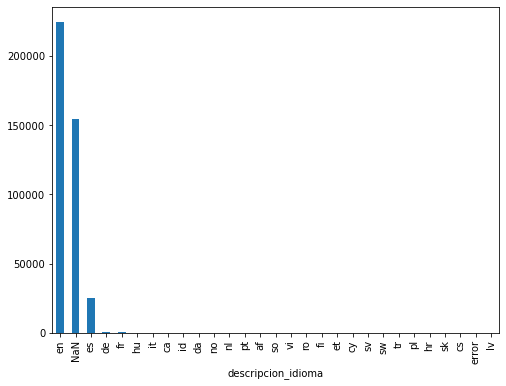

In [75]:
# visualizamos idiomas en el dataset
movies_detect_lang.plot(kind='bar', figsize=(8, 6))

In [76]:
# películas sin decsripción
count_nan = movies_detect['descripcion'].isnull().sum()
print('Número de películas sin descripción: ' + str(count_nan))
nan_perc = count_nan/len(movies_detect)
print('% de películas sin descripción:      '+ str(f"{nan_perc:.0%}"))

Número de películas sin descripción: 154415
% de películas sin descripción:      38%


In [5]:
# películas con la descripción en inglés
count_en = movies_detect.descripcion_idioma.value_counts().en
print('Número de películas con la descripción en inglés: ' + str(count_en))
en_perc = count_en/len(movies_detect)
print('% de películas con la descripción en inglés:      '+ str(f"{en_perc:.0%}"))

Número de películas con la descripción en inglés: 224307
% de películas con la descripción en inglés:      55%


In [24]:
# películas con la descripción en español
count_error = movies_detect.descripcion_idioma.value_counts().es
print('Número de películas con la descripción en español: ' + str(count_error))
error_perc = count_error/len(movies_detect)
print('% de películas con la descripción en español:      '+ str(f"{error_perc:.0%}"))

Número de películas con la descripción en español: 24873
% de películas con la descripción en español:      6%


In [7]:
# vemos que tipo de error hay en dataset
movies_detect.loc[movies_detect['descripcion_idioma'] == 'error']

,titulo,link,descripcion,descripcion_idioma
64308,Testing Movie1,https://www.imdb.com/title/tt2418644/?ref_=adv...,👌👌👌👌👌👌👌,error


In [57]:
# reducimos el tamaño de dataset y dejamos solamente los idiomas (español e inglés) con los que vamos a trabajar 
movies_detect_en = movies_detect.loc[movies_detect['descripcion_idioma'] == 'en']
movies_detect_es = movies_detect.loc[movies_detect['descripcion_idioma'] == 'es']
movies_detect_red = pd.concat([movies_detect_en, movies_detect_es])
movies_detect_red.shape

(249180, 4)

In [60]:
# películas con la descripción en inglés y español en el dataset reducido
print('% de películas con la descripción en inglés:  '+ str(f"{(movies_detect_red.descripcion_idioma.value_counts().en)/len(movies_detect_red):.0%}"))
print('% de películas con la descripción en español: '+ str(f"{(movies_detect_red.descripcion_idioma.value_counts().es)/len(movies_detect_red):.0%}"))

% de películas con la descripción en inglés:  90%
% de películas con la descripción en español: 10%


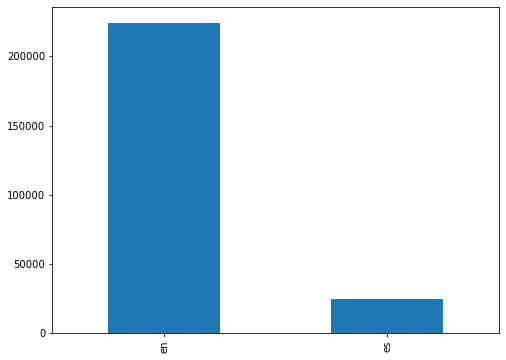

In [61]:
# visualizamos idiomas en el dataset reducido
movies_detect_red.descripcion_idioma.value_counts().plot(kind='bar', figsize=(8, 6))